In [14]:
import pandas as pd  
# Biblioteca para manipulação e análise de dados em tabelas (DataFrames e Series).

from funcoes_ajuda import descritiva, avalia_clf  
# Importa funções personalizadas:
# - `descritiva`: provavelmente para análise descritiva dos dados.
# - `avalia_clf`: para avaliar modelos classificadores.

from sklearn.model_selection import train_test_split  
# Divide os dados em conjuntos de treinamento e teste.

from sklearn.tree import DecisionTreeClassifier  
# Implementa o modelo de árvore de decisão.

from sklearn.metrics import roc_auc_score  
# Calcula a métrica AUC (área sob a curva ROC) para avaliar o desempenho do modelo.

import matplotlib.pyplot as plt  
# Biblioteca para criar gráficos e visualizações.

import seaborn as sns  
# Biblioteca para criar gráficos avançados e estilizados com base no Matplotlib.

In [15]:
# Carrega o arquivo
# O formato Parquet é usado por ser eficiente em armazenamento e processamento
# de dados tabulares
df = pd.read_parquet('exercicio.parquet')

# Exibe informações básicas sobre o DataFrame:
# - Número de linhas e colunas
# - Tipos de dados em cada coluna
# - Contagem de valores não nulos em cada coluna
print(df.info())

# Mostra as primeiras 5 linhas do DataFrame
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   idade               10000 non-null  int32  
 1   renda               10000 non-null  float64
 2   divida              10000 non-null  float64
 3   utilizacao_credito  10000 non-null  float64
 4   consultas_recentes  10000 non-null  float64
 5   inadimplencia       10000 non-null  int32  
 6   idade_cat           10000 non-null  float64
dtypes: float64(5), int32(2)
memory usage: 468.9 KB
None
   idade        renda       divida  utilizacao_credito  consultas_recentes  \
0     56  5001.087921  1999.455126             0.95862            4.875699   
1     69  5000.719625  2000.810295             1.00000            6.445579   
2     46  4999.716997  2001.196934             0.00000            5.101072   
3     32  5001.297920  2000.322691             0.69576            5.748065   
4    

/Users/nayarasobral/Library/Mobile Documents/com~apple~CloudDocs/MBA USP/13. Árvores, Redes e Ensemble Models /Projeto Spyder Aula2/funcoes_ajuda.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=var, palette='viridis', alpha=0.5, ax=ax2)


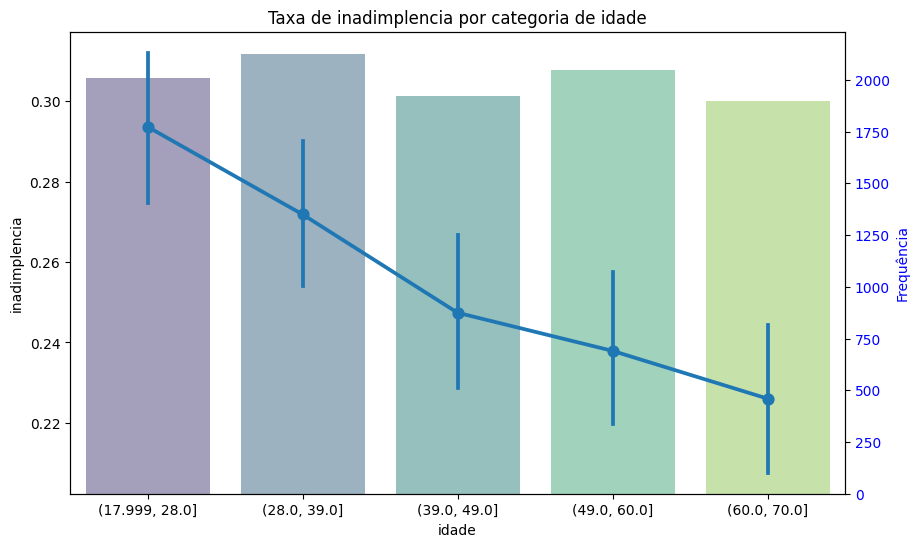

/Users/nayarasobral/Library/Mobile Documents/com~apple~CloudDocs/MBA USP/13. Árvores, Redes e Ensemble Models /Projeto Spyder Aula2/funcoes_ajuda.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=var, palette='viridis', alpha=0.5, ax=ax2)


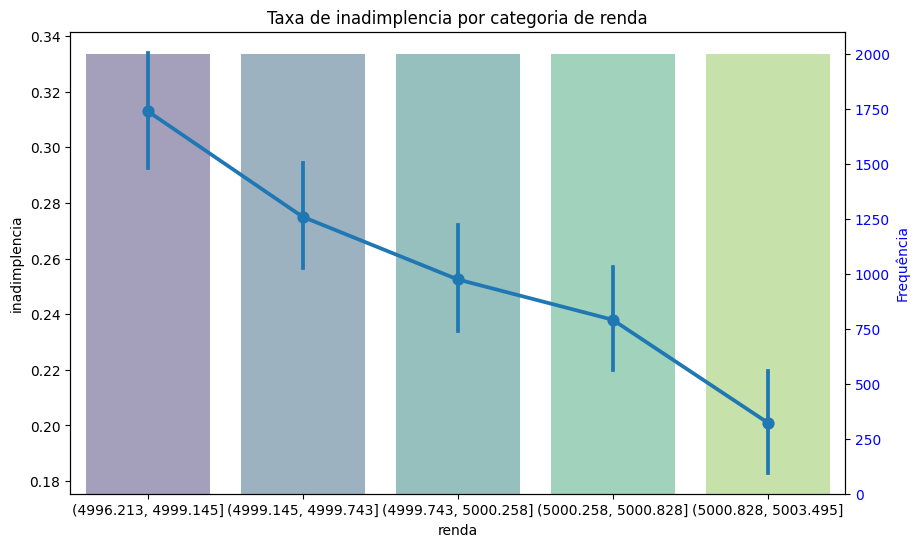

/Users/nayarasobral/Library/Mobile Documents/com~apple~CloudDocs/MBA USP/13. Árvores, Redes e Ensemble Models /Projeto Spyder Aula2/funcoes_ajuda.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=var, palette='viridis', alpha=0.5, ax=ax2)


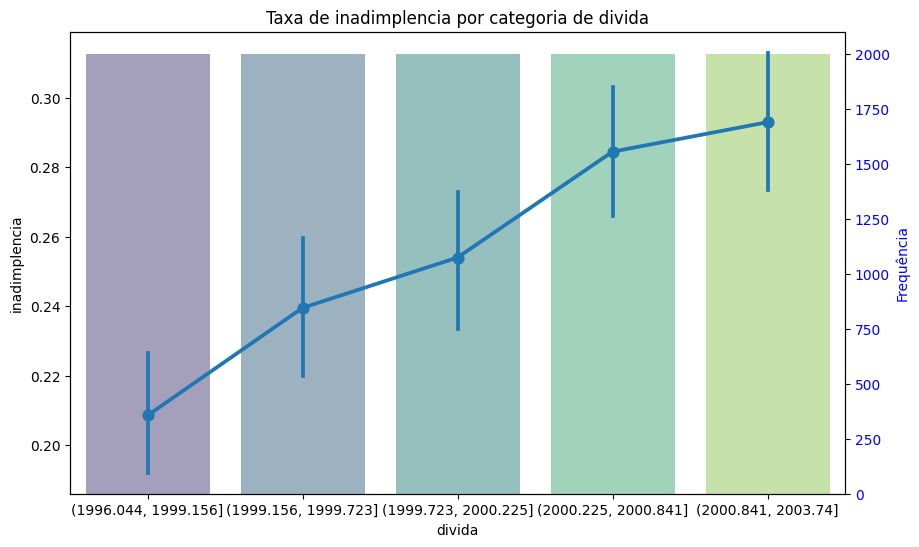

/Users/nayarasobral/Library/Mobile Documents/com~apple~CloudDocs/MBA USP/13. Árvores, Redes e Ensemble Models /Projeto Spyder Aula2/funcoes_ajuda.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=var, palette='viridis', alpha=0.5, ax=ax2)


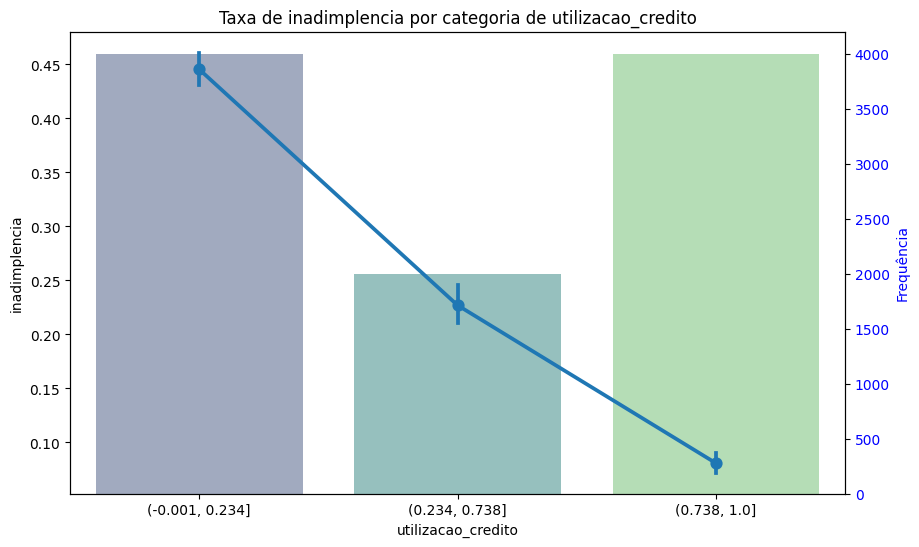

/Users/nayarasobral/Library/Mobile Documents/com~apple~CloudDocs/MBA USP/13. Árvores, Redes e Ensemble Models /Projeto Spyder Aula2/funcoes_ajuda.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=var, palette='viridis', alpha=0.5, ax=ax2)


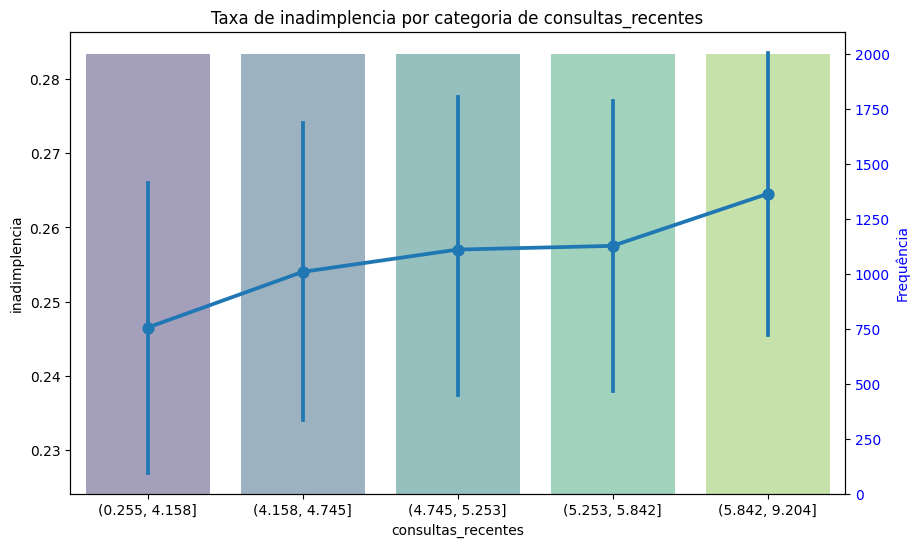

/Users/nayarasobral/Library/Mobile Documents/com~apple~CloudDocs/MBA USP/13. Árvores, Redes e Ensemble Models /Projeto Spyder Aula2/funcoes_ajuda.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=var, palette='viridis', alpha=0.5, ax=ax2)


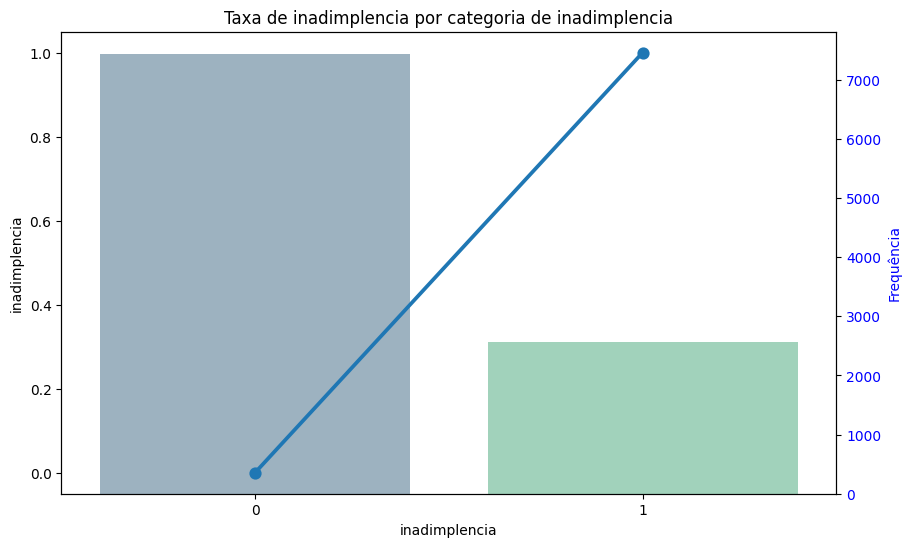

/Users/nayarasobral/Library/Mobile Documents/com~apple~CloudDocs/MBA USP/13. Árvores, Redes e Ensemble Models /Projeto Spyder Aula2/funcoes_ajuda.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=var, palette='viridis', alpha=0.5, ax=ax2)


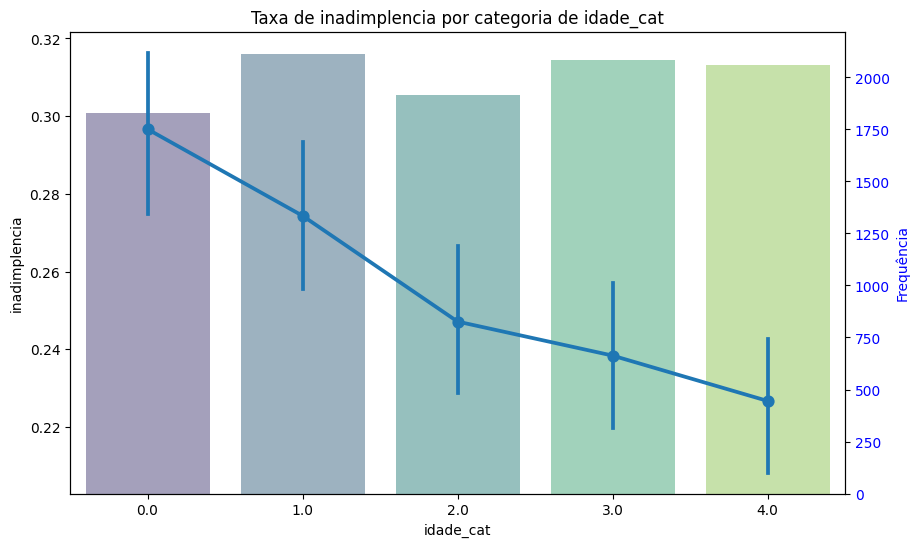

In [2]:
# Descritivas básicas
# Este laço percorre todas as colunas do DataFrame e gera análises descritivas para cada variável.
# A função 'descritiva' provavelmente cria análises estatísticas ou visuais para cada variável 'var'.
# O parâmetro 'vresp' indica a variável target (neste caso, 'inadimplencia'), 
# que é a variável de resposta ou dependente usada para análise.

for var in df.columns:
    descritiva(df, var=var, vresp='inadimplencia')   

In [3]:
# Separação das variáveis dependente (target) e independentes (features)
# 'y' representa a variável target 'inadimplencia', que será usada como o objetivo de predição.
# 'X' contém todas as outras variáveis independentes, excluindo 'inadimplencia'.
y = df['inadimplencia']
X = df.drop('inadimplencia', axis=1)

# Divide os dados em conjuntos de treino e teste.
# - 80% dos dados serão usados para treinamento e 20% para teste (test_size=0.2).
# - 'random_state' garante reprodutibilidade ao fixar a semente de geração aleatória.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2360873)

# Exibe as dimensões (número de linhas e colunas) dos conjuntos de treino e teste.
# Isso é útil para verificar se a divisão foi feita corretamente.
print("X_train shape:", X_train.shape)  # Formato do conjunto de treino (variáveis independentes)
print("y_train shape:", y_train.shape)  # Formato do conjunto de treino (variável target)
print("X_test shape:", X_test.shape)    # Formato do conjunto de teste (variáveis independentes)
print("y_test shape:", y_test.shape)    # Formato do conjunto de teste (variável target)


X_train shape: (8000, 6)
y_train shape: (8000,)
X_test shape: (2000, 6)
y_test shape: (2000,)


In [7]:
# Treinando o modelo de árvore de decisão

# Cria uma instância do modelo de árvore de decisão
# Sem parâmetros especificados, o modelo usará os valores padrão do scikit-learn.
# Por padrão, ele utiliza o critério "gini" para medir a qualidade da divisão.
clf = DecisionTreeClassifier()

# Ajusta (treina) o modelo usando os dados de treino
# O método .fit() utiliza as variáveis independentes (X_train) e a variável target (y_train)
# para aprender as regras da árvore de decisão.
clf.fit(X_train, y_train)


DecisionTreeClassifier()


Base de treino:
A acurácia da árvore é: 100.0%
A acurácia balanceada da árvore é: 100.0%
AUC-ROC: 100.00%
GINI: 100.00%

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5978
           1       1.00      1.00      1.00      2022

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000



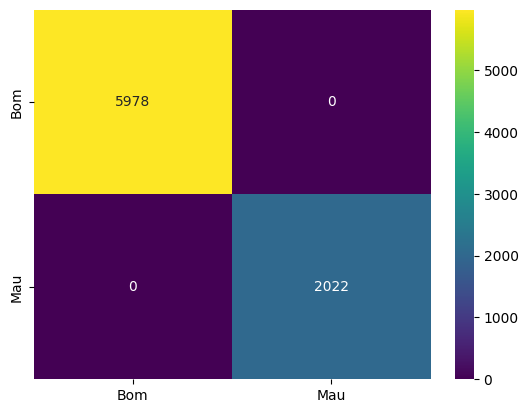

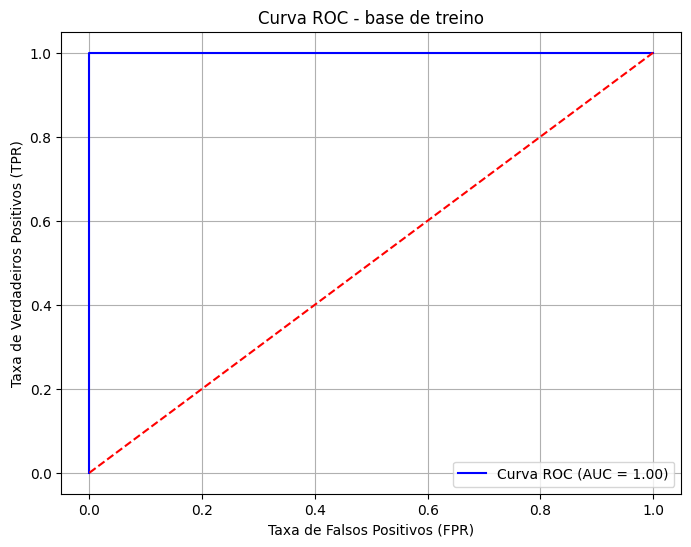

In [6]:
# Avaliação do modelo na base de treino

# A função 'avalia_clf' avalia o desempenho do classificador 'clf'.
# Parâmetros explicados:
# - 'clf': O modelo treinado (árvore de decisão neste caso).
# - 'y_train': A variável target (verdadeira) do conjunto de treino.
# - 'X_train': As variáveis independentes do conjunto de treino.
# - 'rótulos_y': Os rótulos das classes na variável target ('Bom' para positivos e 'Mau' para negativos).
# - 'base': Especifica que a avaliação está sendo feita na base de treino.

avalia_clf(clf, y_train, X_train, rótulos_y=['Bom', 'Mau'], base='treino')



Base de teste:
A acurácia da árvore é: 68.0%
A acurácia balanceada da árvore é: 59.0%
AUC-ROC: 58.97%
GINI: 17.95%

               precision    recall  f1-score   support

           0       0.78      0.78      0.78      1463
           1       0.40      0.39      0.40       537

    accuracy                           0.68      2000
   macro avg       0.59      0.59      0.59      2000
weighted avg       0.68      0.68      0.68      2000



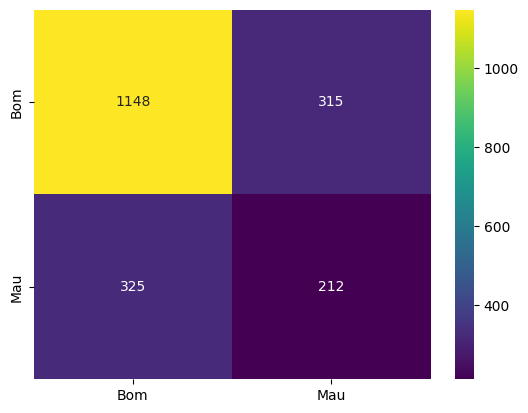

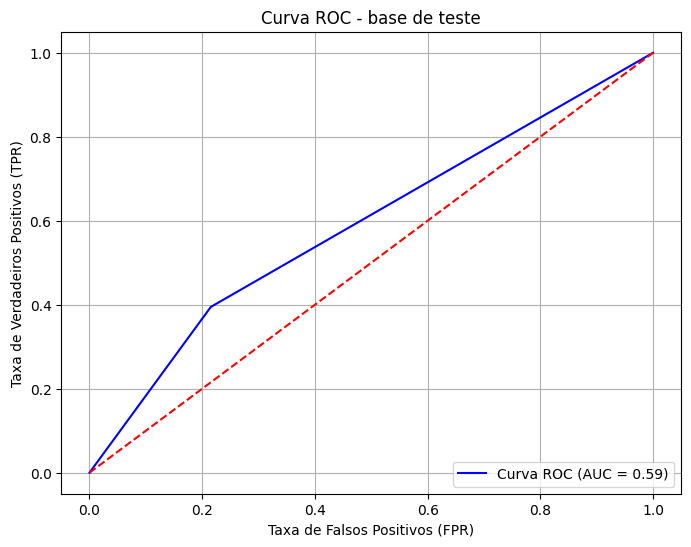

In [8]:
# Avaliação do modelo na base de teste

# A função 'avalia_clf' realiza a avaliação do desempenho do classificador 'clf' na base de teste.
# Parâmetros explicados:
# - 'clf': O modelo treinado (árvore de decisão).
# - 'y_test': A variável target (verdadeira) do conjunto de teste.
# - 'X_test': As variáveis independentes do conjunto de teste.
# - 'rótulos_y': Os rótulos das classes na variável target ('Bom' para positivos e 'Mau' para negativos).
# - 'base': Indica que a avaliação está sendo feita na base de teste.

avalia_clf(clf, y_test, X_test, rótulos_y=['Bom', 'Mau'], base='teste')


In [9]:
#%% Obter os valores de CCP (Cost Complexity Pruning) desta árvore

# O método `cost_complexity_pruning_path` retorna os valores de ccp_alpha (parâmetro de poda)
# e as correspondentes impurezas totais para os nós da árvore.
# Isso é usado para explorar diferentes níveis de poda da árvore.
# A saída é convertida para um DataFrame para facilitar a análise.

ccp_path = pd.DataFrame(clf.cost_complexity_pruning_path(X_train, y_train))


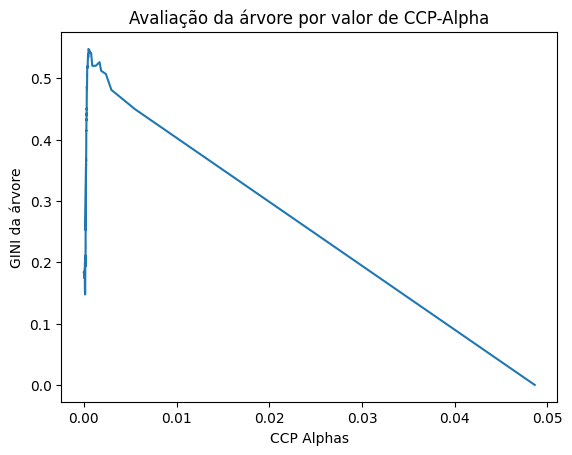

O GINI máximo é de: 54.78%
Obtido com um ccp de: 0.0005029846903725071


In [11]:
#%% Tunando a árvore

# Lista para armazenar os valores de GINI para cada nível de CCP Alpha
GINIs = []

# Loop pelos valores de ccp_alpha obtidos da árvore
for ccp in ccp_path['ccp_alphas']:
    # Cria um modelo de árvore de decisão com o valor atual de ccp_alpha
    arvore = DecisionTreeClassifier(
        criterion='gini',  # Critério para medir a qualidade da divisão (Gini impurity)
        max_depth=30,      # Profundidade máxima da árvore
        random_state=42,   # Semente para resultados reprodutíveis
        ccp_alpha=ccp      # Parâmetro de poda
    )

    # Treinar o modelo usando os dados de treinamento
    arvore.fit(X_train, y_train)

    # Avaliar a performance da árvore no conjunto de teste
    # Calcula a AUC (Área sob a Curva ROC)
    AUC = roc_auc_score(y_test, arvore.predict_proba(X_test)[:, -1])
    
    # Converte a AUC em GINI
    # GINI é calculado como: (AUC - 0.5) * 2
    GINI = (AUC - 0.5) * 2
    
    # Adiciona o valor de GINI à lista
    GINIs.append(GINI)

# Plotar a relação entre CCP Alpha e GINI
sns.lineplot(x=ccp_path['ccp_alphas'], y=GINIs)

# Criação de um DataFrame para armazenar os resultados das avaliações
df_avaliacoes = pd.DataFrame({'ccp': ccp_path['ccp_alphas'], 'GINI': GINIs})

# Identificar o maior valor de GINI e o ccp_alpha correspondente
GINI_max = df_avaliacoes.GINI.max()  # GINI máximo
ccp_max = df_avaliacoes.loc[df_avaliacoes.GINI == GINI_max, 'ccp'].values[0]  # Melhor ccp_alpha

# Personalizar e exibir o gráfico
plt.ylabel('GINI da árvore')  # Rótulo do eixo Y
plt.xlabel('CCP Alphas')     # Rótulo do eixo X
plt.title('Avaliação da árvore por valor de CCP-Alpha')  # Título do gráfico
plt.show()

# Imprimir o GINI máximo e o valor correspondente de CCP Alpha
print(f'O GINI máximo é de: {GINI_max:.2%}\nObtido com um ccp de: {ccp_max}')


In [12]:
# Criar e treinar a árvore de decisão com o melhor valor de CCP Alpha

# 'arvore_tunada' será a árvore de decisão ajustada com o valor ótimo de ccp_alpha (ccp_max).
# Este valor foi identificado como aquele que maximiza o GINI no processo de tunagem.

arvore_tunada = DecisionTreeClassifier(
    criterion='gini',  # Critério usado para medir a qualidade das divisões (Gini impurity)
    max_depth=30,      # Define a profundidade máxima da árvore
    random_state=42,   # Semente para garantir reprodutibilidade dos resultados
    ccp_alpha=ccp_max  # Melhor valor de ccp_alpha obtido durante a tunagem
).fit(X_train, y_train)  # Treina a árvore nos dados de treino (X_train e y_train)


Avaliando a base de treino:

Base de treino:
A acurácia da árvore é: 76.7%
A acurácia balanceada da árvore é: 59.6%
AUC-ROC: 77.01%
GINI: 54.01%

               precision    recall  f1-score   support

           0       0.79      0.94      0.86      5978
           1       0.59      0.25      0.35      2022

    accuracy                           0.77      8000
   macro avg       0.69      0.60      0.60      8000
weighted avg       0.74      0.77      0.73      8000



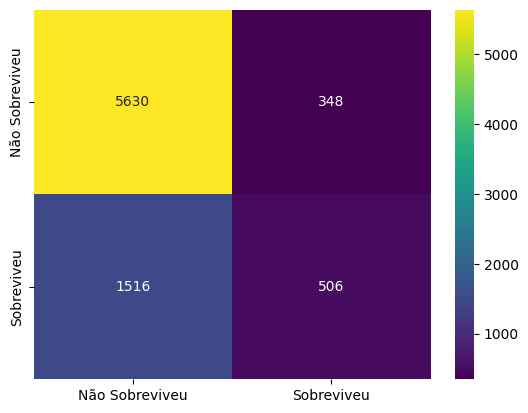

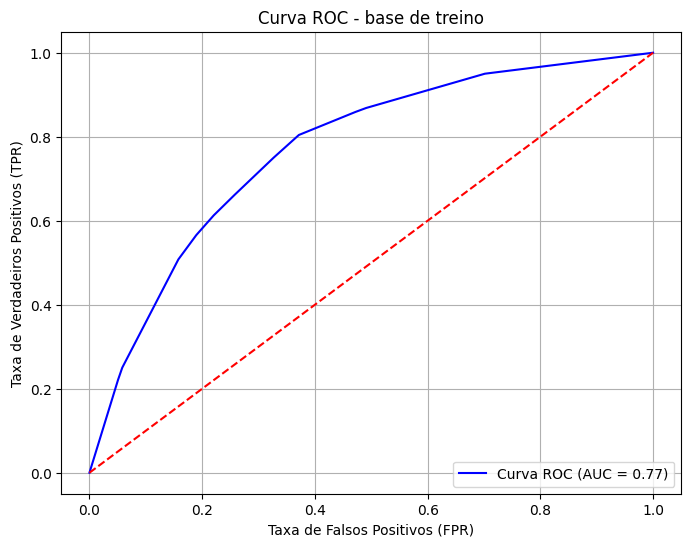

Avaliando a base de teste:

Base de teste:
A acurácia da árvore é: 75.3%
A acurácia balanceada da árvore é: 59.9%
AUC-ROC: 77.39%
GINI: 54.78%

               precision    recall  f1-score   support

           0       0.78      0.93      0.85      1463
           1       0.59      0.27      0.37       537

    accuracy                           0.75      2000
   macro avg       0.68      0.60      0.61      2000
weighted avg       0.73      0.75      0.72      2000



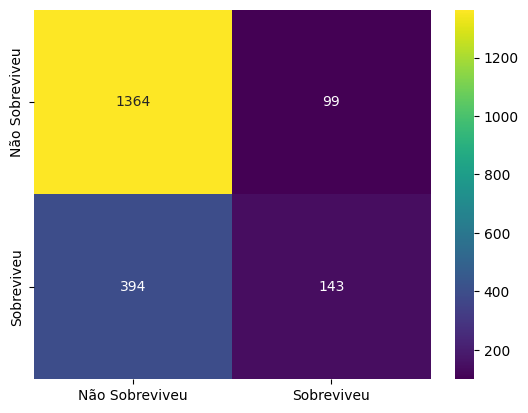

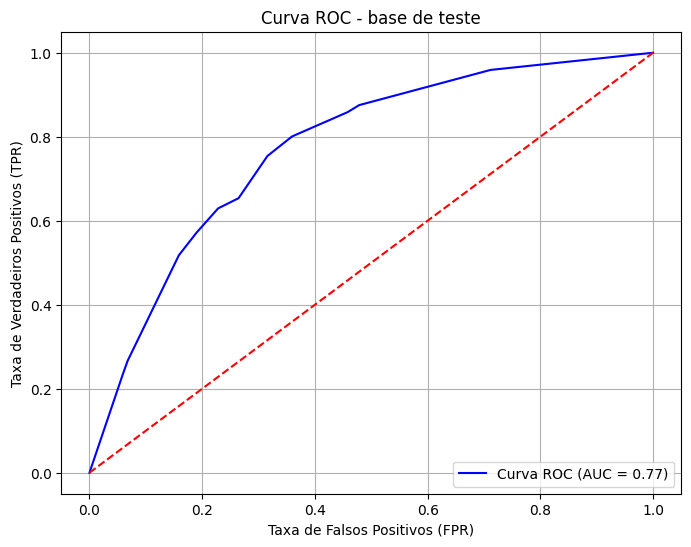

In [13]:
# Avaliar o modelo ajustado (árvore tunada) na base de treino e teste

# Avaliação na base de treino
print('Avaliando a base de treino:')
# A função 'avalia_clf' realiza a avaliação do modelo 'arvore_tunada' nos dados de treino.
# Parâmetros:
# - 'arvore_tunada': O modelo ajustado com o melhor valor de ccp_alpha.
# - 'y_train': A variável target verdadeira para os dados de treino.
# - 'X_train': As variáveis independentes do conjunto de treino.
# - 'base': Identifica que a avaliação está sendo feita na base de treino.
avalia_clf(arvore_tunada, y_train, X_train, base='treino')

# Avaliação na base de teste
print('Avaliando a base de teste:')
# A função 'avalia_clf' realiza a avaliação do modelo 'arvore_tunada' nos dados de teste.
# Parâmetros:
# - 'arvore_tunada': O modelo ajustado com o melhor valor de ccp_alpha.
# - 'y_test': A variável target verdadeira para os dados de teste.
# - 'X_test': As variáveis independentes do conjunto de teste.
# - 'base': Identifica que a avaliação está sendo feita na base de teste.
avalia_clf(arvore_tunada, y_test, X_test, base='teste')
